# Assignment 

In [26]:
# Here are the steps to do 
# 1. Import and inspect the datasets.
# 2. Handle missing values, incorrect data types, and duplicates.

# Import the required liabraries

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

# Load DataSets 

In [6]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Preview Datasets

In [7]:
print("Customers Head: \n", customers.isnull().sum())
print("Products Head: \n", products.head())
print("Transactions Head: \n", transactions.head())

Customers Head: 
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products Head: 
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions Head: 
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.6

# Data Cleaning
# Check for missing values

In [8]:
print("Missing Values in Customers:\n", customers.isnull().sum())
print("Missing Values in Products: \n", products.isnull().sum())
print("Missing Values in Transactions", transactions.isnull().sum())

Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing Values in Products: 
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing Values in Transactions TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Convert Dates to Datetime format

In [9]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Check for the duplicates of data

In [11]:
print("Duplicate Rows in Customers:", customers.duplicated().sum())
print("Duplicate Rows in Products:", products.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions.duplicated().sum())

Duplicate Rows in Customers: 0
Duplicate Rows in Products: 0
Duplicate Rows in Transactions: 0


# Merge DataSets

In [12]:
merged_data = transactions.merge(customers, on = 'CustomerID').merge(products, on = 'ProductID')

# General Statistics  

In [13]:
print("Merged Data Overview:\n", merged_data.describe())

Merged Data Overview:
           Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [16]:

sales_trend = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M')).agg({'TotalValue': 'sum'}).reset_index()
sales_trend['TransactionDate'] = sales_trend['TransactionDate'].dt.to_timestamp()

# Check the first few rows of 'sales_trend'
print(sales_trend.head())


  TransactionDate  TotalValue
0      2023-12-01     3769.52
1      2024-01-01    66376.39
2      2024-02-01    51459.27
3      2024-03-01    47828.73
4      2024-04-01    57519.06


# Plotting of figures

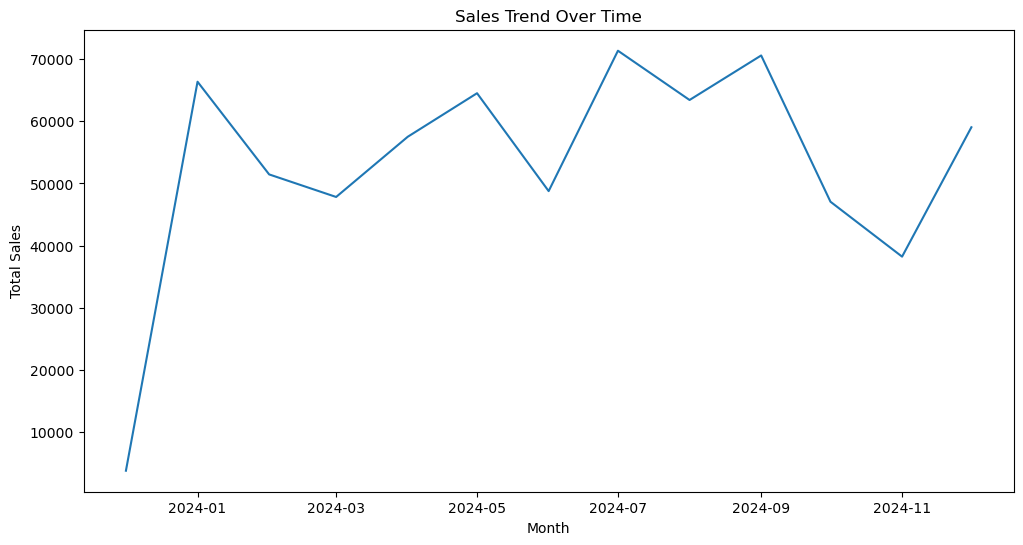

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='TransactionDate', y='TotalValue')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Top products by sales 

In [19]:
top_products = merged_data.groupby('ProductName').agg({'TotalValue': 'sum'}).sort_values(by='TotalValue', ascending=False).head(10)

# Plotting of figures 

<Figure size 1000x600 with 0 Axes>

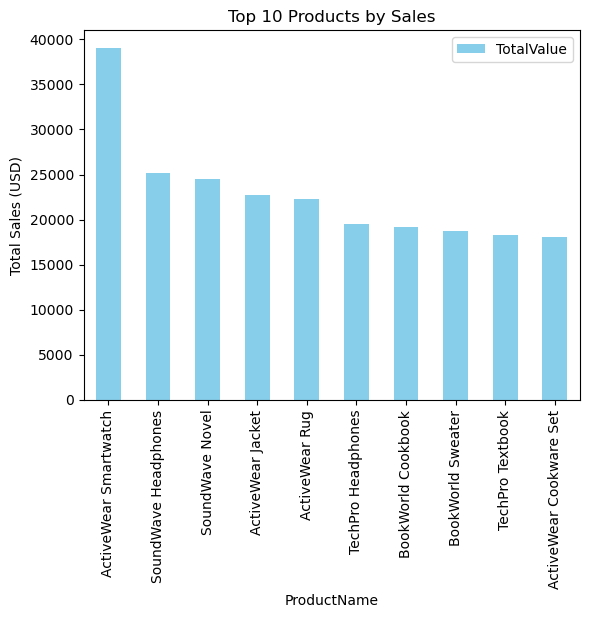

In [20]:
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Sales')
plt.ylabel('Total Sales (USD)')
plt.show()

# Regional sales distribution

In [21]:
regional_sales = merged_data.groupby('Region').agg({'TotalValue': 'sum'}).reset_index()

# Plotting figures

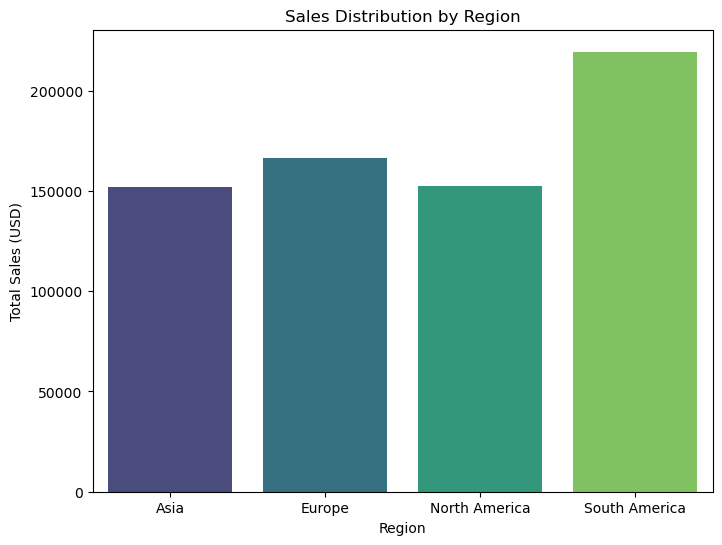

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(data=regional_sales, x='Region', y='TotalValue', palette='viridis')
plt.title('Sales Distribution by Region')
plt.ylabel('Total Sales (USD)')
plt.show()

In [23]:
# Customer acquisition trend
signup_trend = customers.groupby(customers['SignupDate'].dt.to_period('M')).size().reset_index(name='CustomerCount')
signup_trend['SignupDate'] = signup_trend['SignupDate'].dt.to_timestamp()

# Plotting figures

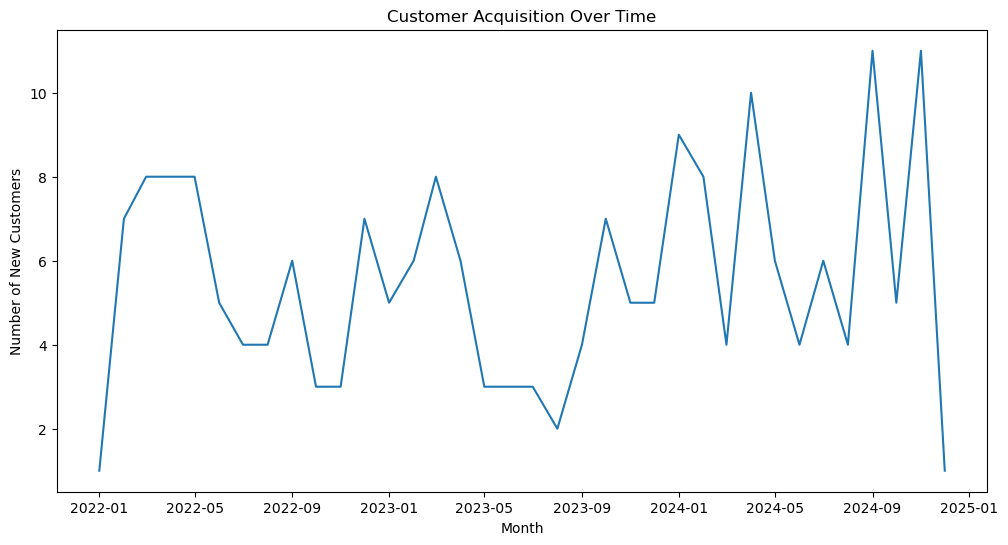

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=signup_trend, x='SignupDate', y='CustomerCount')
plt.title('Customer Acquisition Over Time')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.show()

In [25]:
# Export processed data for further analysis
merged_data.to_csv('Processed_Ecommerce_Data.csv', index=False)